In [1]:
import twitter
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#### https://github.com/bear/python-twitter/blob/master/get_access_token.py

from __future__ import print_function

from requests_oauthlib import OAuth1Session
import webbrowser

import sys

if sys.version_info.major < 3:
    input = raw_input

REQUEST_TOKEN_URL = 'https://api.twitter.com/oauth/request_token'
ACCESS_TOKEN_URL = 'https://api.twitter.com/oauth/access_token'
AUTHORIZATION_URL = 'https://api.twitter.com/oauth/authorize'
SIGNIN_URL = 'https://api.twitter.com/oauth/authenticate'


def get_access_token(consumer_key, consumer_secret):
    """Get an access token for a given consumer key and secret.
    Args:
        consumer_key (str):
            Your application consumer key.
        consumer_secret (str):
            Your application consumer secret.
    Returns:
        (None) Prints to command line.
    """
    oauth_client = OAuth1Session(consumer_key, client_secret=consumer_secret, callback_uri='oob')

    print('\nRequesting temp token from Twitter...\n')

    resp = oauth_client.fetch_request_token(REQUEST_TOKEN_URL)

    url = oauth_client.authorization_url(AUTHORIZATION_URL)

    print('I will try to start a browser to visit the following Twitter page '
          'if a browser will not start, copy the URL to your browser '
          'and retrieve the pincode to be used '
          'in the next step to obtaining an Authentication Token: \n'
          '\n\t{0}'.format(url))

    webbrowser.open(url)
    pincode = input('\nEnter your pincode? ')

    print('\nGenerating and signing request for an access token...\n')

    oauth_client = OAuth1Session(consumer_key, client_secret=consumer_secret,
                                 resource_owner_key=resp.get('oauth_token'),
                                 resource_owner_secret=resp.get('oauth_token_secret'),
                                 verifier=pincode)
    try:
        resp = oauth_client.fetch_access_token(ACCESS_TOKEN_URL)
    except ValueError as e:
        raise 'Invalid response from Twitter requesting temp token: {0}'.format(e)

    print('''Your tokens/keys are as follows:
        consumer_key         = {ck}
        consumer_secret      = {cs}
        access_token_key     = {atk}
        access_token_secret  = {ats}'''.format(
            ck=consumer_key,
            cs=consumer_secret,
            atk=resp.get('oauth_token'),
            ats=resp.get('oauth_token_secret')))


def main():
    """Run script to get access token and secret for given app."""
    consumer_key = input('Enter your consumer key: ')
    consumer_secret = input('Enter your consumer secret: ')
    get_access_token(consumer_key, consumer_secret)

In [ ]:
main()

In [15]:




api = twitter.Api(consumer_key=consumer_key,
                              consumer_secret=consumer_secret,
                              access_token_key=access_token_key,
                              access_token_secret=access_token_secret)

print(api.VerifyCredentials())

api.GetFollowers()

timeline = api.GetUserTimeline(screen_name='BernieSanders', count=5000)

timeline[0]

def convert_twitter_output(timeline):
    output = []
    for tweet in timeline:
        tw ={'created':tweet.created_at,'text':tweet.text}
        output.append(tw)
    return output
    

tweets = convert_twitter_output(timeline)

df = pd.DataFrame(tweets)

In [16]:
df['text']

0      Two years ago, Amazon raised their minimum wag...
1      “My son and so many other children, their live...
2      This is what narcissism is about. Trump, in or...
3      We are going to take the fight for justice fro...
4      The people are crying out against police bruta...
                             ...                        
195    This is what a rigged and corrupt economy look...
196    This is catastrophic. We need to keep every em...
197    The coronavirus crisis has had a devastating e...
198    RT @RealJusticePAC: TONIGHT: Jails are major C...
199    TONIGHT: Join us for a live town hall on the d...
Name: text, Length: 200, dtype: object

In [17]:
import re

In [18]:
# cleaning 

def remove_url(txt):
    return re.sub(r"http\S+", "", txt)
    
def remove_rt(txt):
    return re.sub(r"RT", "", txt)
      
def remove_hashtag(txt):
    return re.sub(r'#\S+','', txt)

def remove_mentions(txt):
    return re.sub(r'@\S+','', txt)

def remove_controls(txt):
    return re.sub(r'[\n\r\t\f\v]','',txt)

def remove_whitespaces(txt):
    return re.sub(r'  +','',txt)

def remove_whitespaces_start_end(txt):
    return re.sub(r'^\s+|\s+$','',txt)

def remove_numbers(txt):
    return re.sub(r'\d','',txt)

def remove_special_characters(txt):
    return re.sub(r'[^\w ]+','',txt)


function_list=[remove_url, remove_rt, remove_controls, remove_mentions, remove_hashtag, remove_whitespaces, remove_numbers, remove_special_characters, remove_whitespaces_start_end]

In [19]:
for func in function_list:
    df['text'] = df['text'].apply(lambda x: func(x))

In [20]:
print(df['text'])

0      Two years ago Amazon raised their minimum wage...
1      My son and so many other children their lives ...
2      This is what narcissism is about Trump in orde...
3      We are going to take the fight for justice fro...
4      The people are crying out against police bruta...
                             ...                        
195    This is what a rigged and corrupt economy look...
196    This is catastrophic We need to keep every emp...
197    The coronavirus crisis has had a devastating e...
198    TONIGHT Jails are major COVID hotspots and thi...
199    TONIGHT Join us for a live town hall on the de...
Name: text, Length: 200, dtype: object


In [21]:
import nltk
#nltk.download()

In [22]:
from nltk.tokenize import RegexpTokenizer

In [23]:
tokenizer = RegexpTokenizer(r'\w+')
    
df['text'] = df['text'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [24]:
from nltk.corpus import stopwords

def remove_stopwords(x):
    return [ww for ww in x if ww not in stopwords.words('english')]

df['text'] = df['text'].apply(lambda x: remove_stopwords(x)) 

In [25]:
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

In [26]:
def word_lemmatizer(x):
    return [lemmatizer.lemmatize(ww) for ww in x]

df['text'] = df['text'].apply(lambda x: word_lemmatizer(x)) 

In [27]:
def resolve_lists(x):
    return " ".join(ww for ww in x)

In [28]:
df['text'] = df['text'].apply(lambda x: resolve_lists(x)) 

In [29]:
from textblob import TextBlob

In [42]:
def senti(x):
    return TextBlob(x).sentiment 

df['sentiment']=df['text'].apply(lambda x: senti(x).polarity)
df['subjectivity']=df['text'].apply(lambda x: senti(x).subjectivity)

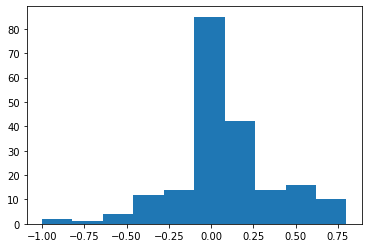

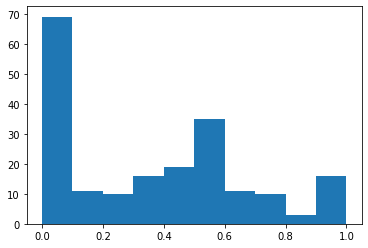

In [43]:
plt.hist(df['sentiment'])
plt.show()
plt.hist(df['subjectivity'])
plt.show()